# X Account Data
### for @bodhichristian

This notebook is an exploration of X data using pandas and numpy to make useful inferences.

Data in current directory:  
- <b>account_overview_year.csv</b> - 365 days of account-related data such as Likes, New follows, and Profile visits  
- <b>account_content_quarter.csv</b> - 3 months of post-related data such as Post Id, Post text, and Engagements  

In [39]:
## Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [84]:
overview = pd.read_csv('account_overview_year.csv')
posts = pd.read_csv('posts_3M.csv')

## Account Overview Preview

In [85]:
overview.head(2)

,Date,Impressions,Likes,Engagements,Bookmarks,Shares,New follows,Unfollows,Replies,Reposts,Profile visits,Create Post,Video views,Media views
0,"Mon, Feb 24, 2025",640,3,8,0,0,0,0,0,0,1,0,0,0
1,"Sun, Feb 23, 2025",1951,9,51,2,0,1,1,6,0,12,2,0,0


### Clean dates

In [86]:
# %a - abbreviated weekday name ('Mon')
# %b - abbreviated month name ('Feb')
# %d - day of the month ('25')
# %Y - four digit year (2025)

overview['Date'] = pd.to_datetime(overview['Date'], format='%a, %b %d, %Y')
grouped = overview.groupby(overview['Date'].dt.month)
grouped.size()

Date
1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
dtype: int64

### Average Daily Engagement

In [87]:
avg_daily_engagement = (overview['Engagements'] / overview['Impressions']).mean() * 100
print(f'Average daily engagment: {avg_daily_engagement.round(2)}')

Average daily engagment: 3.82


### Net Daily Follower Change

In [88]:
net_follower_change = overview['New follows'] - overview['Unfollows']
print(f'Largest follower increase: {net_follower_change.max()}')
print(f'Largest follower decrease: {net_follower_change.min()}')
print(f'Average daily change: {net_follower_change.mean().round(2)}')

Largest follower increase: 94
Largest follower decrease: -5
Average daily change: 3.98


## Posts Preview

In [92]:
posts.head(2)

,Post id,Date,Post text,Link,Impressions,Likes,Engagements,Bookmarks,Share,New follows,Replies,Reposts,Profile visits,Detail expands,Url clicks,Hashtag clicks,Permalink clicks
0,1894144221424026012,2025-02-24,@KevinNaughtonJr it’s an acronym?,https://x.com/bodhichristian/status/1894144221...,409,0,2,0,0,0,0,0,1,1,0,0,0
1,1894097177032458244,2025-02-23,@OrdinaryInds https://t.co/10czV0rjBF,https://x.com/bodhichristian/status/1894097177...,11,1,1,0,0,0,0,0,0,0,0,0,0


### Clean dates

In [90]:
# %a - abbreviated weekday name ('Mon')
# %b - abbreviated month name ('Feb')
# %d - day of the month ('25')
# %Y - four digit year (2025)

posts['Date'] = pd.to_datetime(overview['Date'], format='%a, %b %d, %Y')

### Post Data

In [95]:
total_posts = len(posts)
monthly_average = round((total_posts / 3))
print(f'{total_posts} posts over the last 90 days, averaging ~{monthly_average} posts monthly')

250 posts over the last 90 days, averaging ~83 posts monthly


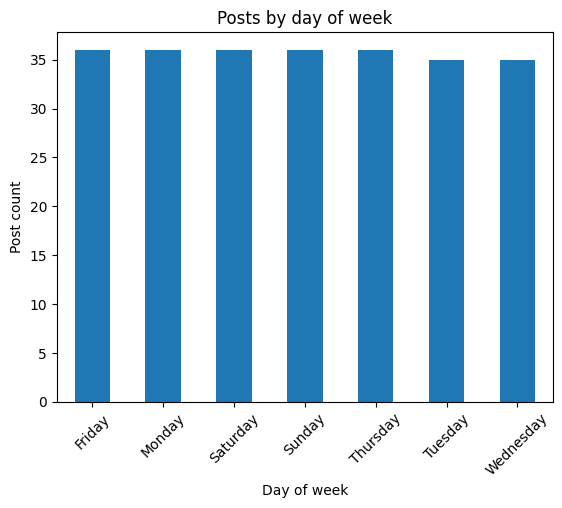

In [103]:
posts['day_of_week'] = posts['Date'].dt.day_name()
daily_post_count = posts.groupby('day_of_week').size()
daily_post_count.plot(kind='bar')

plt.xlabel('Day of week')
plt.ylabel('Post count')
plt.title('Posts by day of week')
plt.xticks(rotation=45)
plt.show()

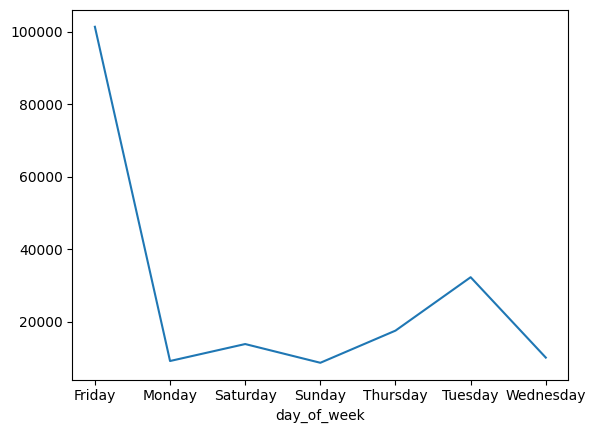

In [105]:
daily_impressions = posts.groupby('day_of_week')['Impressions'].sum()
daily_impressions.plot(kind='line')
plt.show()

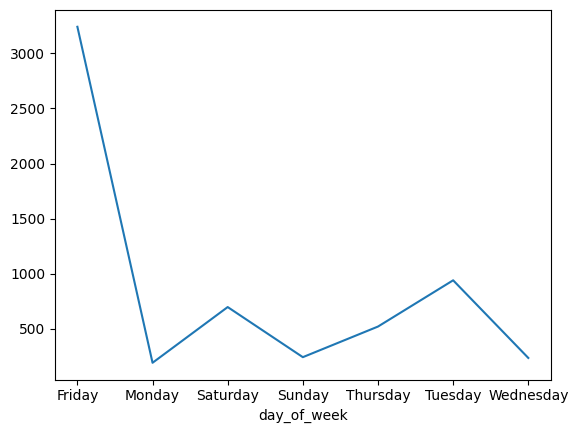

In [106]:
daily_engagements = posts.groupby('day_of_week')['Engagements'].sum()
daily_engagements.plot(kind='line')
plt.show()

In [9]:
total_bookmarks = posts['Bookmarks'].sum()
print(f'Users bookmarked your posts {total_bookmarks} times')

Users bookmarked your posts 853 times


In [10]:
total_profile_visits = posts['Profile visits'].sum()
print(f'Your posts brought {total_profile_visits} visits to your profile.')

Your posts brought 721 visits to your profile.


In [11]:
total_likes = posts['Likes'].sum()
avg_likes = total_likes / len(posts)
print(f'Your posts received an average of {avg_likes} likes.')

Your posts received an average of 7.284 likes.


In [70]:
top_post_text = posts[posts['Likes'] == posts['Likes'].max()]['Post text'].values[0]
print(f'Top post of the last 90 days: \n{top_post_text}')

Top post of the last 90 days: 
decided it’s time to learn app intents. rigged up a simple use case with two intents, and exposed them to the system as a shortcut. code in replies ⬇️ https://t.co/jxXGOPH18r


In [76]:
op_posts = posts.copy()
op_posts = op_posts[~op_posts['Post text'].str.startswith('@')]
op_posts['word_count'] = op_posts['Post text'].str.split().str.len()
max = op_posts['word_count'].max()
most_verbose_post = op_posts[op_posts['word_count'] == max]['Post text'].values[0]
print(f'Most verbose post of the last 90 days: \n{most_verbose_post}')
print(f'Word count: {max}')

Most verbose post of the last 90 days: 
had my first live coding interview today. not as great as i would’ve liked, but not as bad as it could have been. was tasked with building Conway’s Game of Life to simulate cell survival based on the state of neighboring cells. struggled with the 2D array logic checks, and https://t.co/gQfTreqJbw
Word count: 51


### Reply data

In [12]:
replies = posts['Post text'].str.startswith('@').sum()
total_posts = len(posts)
reply_rate = (replies / total_posts * 100).round(2)
print(f'Replies account for {reply_rate}% of all posts')

Replies account for 50.8% of all posts


In [13]:
replies_df = posts[posts['Post text'].str.startswith('@')]
grouped_replies = replies_df.groupby(posts['Post text'].str.split().str[0]).size()
most_replied = grouped_replies.idxmax()
print(f'{most_replied} has received the most replies')

@OrdinaryInds has received the most replies
